In [2]:
!pip install flat_table

In [8]:
import requests
from bs4 import BeautifulSoup
import html5lib

from skimage import io
import matplotlib.pyplot as plt

import json
from pandas import json_normalize
import flat_table # to "unravel" json to df tables

import pandas as pd
import numpy as np
import re

import os

In [20]:
print(str(os.getcwd())[0:4])

C:\U


In [21]:
filename = str(str(os.getcwd())[0: len(os.getcwd()) - 4]) + "/data/Fremont All Single Family.json"

f = open(filename)
data = json.load(f)

In [22]:
df = json_normalize(data) #original

images = df[df['type'] == 'image'] 
products = df[df['type'] == 'product']

In [23]:
#image preprocessing: 

specs = [col for col in df.columns if 'specs' in col.lower()]

images = images[images.url.apply(lambda x: 'maps' not in x)] #get rid of google map images
images['gburl'] = images.gburl.apply(lambda x: re.findall("^(.*?)-diffbot", x)[0]) #clean gburl

In [24]:
images.columns[~images.columns.isin(specs)] #non spec columns

Index(['xpath', 'naturalHeight', 'width', 'diffbotUri', 'type', 'url',
       'naturalWidth', 'height', 'docId', 'fromSeedUrl', 'seedUrlHash32',
       'parentUrlDocId', 'gburl', 'lastCrawlTimeUTC', 'timestamp', 'images',
       'offerPrice', 'productId', 'multipleProducts', 'availability', 'title',
       'humanLanguage', 'pageUrl', 'text', 'category', 'sku',
       'offerPriceDetails.symbol', 'offerPriceDetails.amount',
       'offerPriceDetails.text', 'primary', 'sentiment', 'siteName', 'html',
       'priceRange.minPrice', 'venue', 'description', 'brand'],
      dtype='object')

In [25]:
# 'https://www.realtor.com/realestateandhomes-search/Fremont_CA/type-single-family-home'
images.gburl.iloc[1]

'https://www.realtor.com/realestateandhomes-detail/34520-Willbridge-Ter_Fremont_CA_94555_M20064-23584'

In [26]:
# URL = 'https://www.realtor.com/realestateandhomes-detail/34239-Maybird-Cir_Fremont_CA_94555_M19530-21488'
URL = 'https://www.realtor.com/realestateandhomes-detail/34520-Willbridge-Ter_Fremont_CA_94555_M20064-23584'

headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) \
           AppleWebKit/601.3.11 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9','Accept-Encoding': 'identity'}

page = requests.get(URL, headers=headers)

In [27]:
#change page to soup
soup = BeautifulSoup(page.content, 'html.parser')

In [28]:
# get the chunk of html that has image urls -- check element in html page (inspect)

html_filtered = soup.find_all('div', attrs={'class': 'background-item'}) 
html_filtered

[<div class="background-item">
 <img alt="34520 Willbridge Ter, Fremont, CA 94555" data-omtag="ldp:photogallery:open-slideshow" src="https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m3874086572xd-r3_w60_h60_q80.jpg" title="34520 Willbridge Ter, Fremont, CA 94555">
 </img></div>,
 <div class="background-item">
 <img alt="34520 Willbridge Ter, Fremont, CA 94555" data-omtag="ldp:photogallery:open-slideshow" src="https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m1065303919xd-r3_w60_h60_q80.jpg" title="34520 Willbridge Ter, Fremont, CA 94555">
 </img></div>,
 <div class="background-item">
 <img alt="34520 Willbridge Ter, Fremont, CA 94555" class="owl-lazy" data-omtag="ldp:photogallery:open-slideshow" data-src="https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m1401207028xd-r3_w60_h60_q80.jpg" src="" title="34520 Willbridge Ter, Fremont, CA 94555">
 </img></div>,
 <div class="background-item">
 <img alt="34520 Willbridge Ter, Fremont, CA 94555" class="owl-lazy" data-omtag

In [29]:
len(html_filtered)

41

In [30]:
# collect/extract image urls from html chunl
image_urls = []
for e in html_filtered: 
    image_urls += re.findall("(http.*\.jpg|\.png|\.JPG|\.PNG)", str(e))

In [31]:
image_urls

['https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m3874086572xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m1065303919xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m1401207028xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m1982132875xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m1667225455xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m3496022374xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m3940178193xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m2250719783xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m310964043xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m3790738440xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m544994688xd-

In [32]:
len(image_urls)

41

In [33]:
image_pixels = [io.imread(x) for x in image_urls]

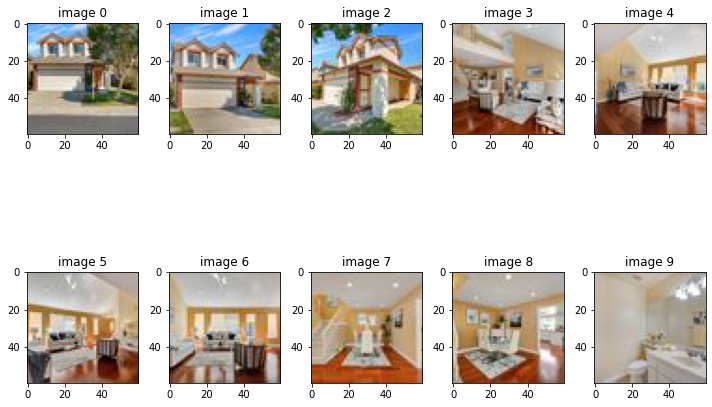

In [34]:
# just looking at first 10 images

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 8))

row = col = 0
for i in np.arange(10):
    ax[row, col].imshow(image_pixels[i])
    ax[row, col].set_title('image {}'.format(i))
    col += 1
    if col > 4: 
        col = 0
        row += 1

plt.tight_layout()

# should have gotten all the gallery images:
# https://www.realtor.com/realestateandhomes-detail/34520-Willbridge-Ter_Fremont_CA_94555_M20064-23584

# Function

In [35]:
#Note: This doesn't take into account exceptions, should prob include that later too

def extract_images(url):
    
    '''
    Input: Takes in a home url address
    Output: Returns list of urls for photo gallery
    '''
    

    headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) \
               AppleWebKit/601.3.11 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9','Accept-Encoding': 'identity'}

    page = requests.get(URL, headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_filtered = soup.find_all('div', attrs={'class': 'background-item'}) 

    image_urls = []
    for e in html_filtered: 
        image_urls += re.findall("(http.*\.jpg|\.png|\.JPG|\.PNG)", str(e))
        
    return image_urls

<!DOCTYPE html>

<html lang="en">
<head>
<link href="https://static.rdc-next-basecamp.rdc.moveaws.com/assets/favicon-144287b492113455703667bc3182768a9b2666765a1cd4beba38cfe40294eccc.ico" rel="shortcut icon" type="image/x-icon"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=com.move.realtor" name="google-play-app"/>
<meta content="rdc-next-basecamp-v137.0-rc" name="app-version">
<meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" name="viewport"/>
<meta content="Browse photos and price history of this 3 bed, 3 bath, 1,839 Sq. Ft. recently sold home at 34520 Willbridge Ter, Fremont, CA 94555 that sold on October  9, 2020  for Last Sold for $1,350,000" name="description">
<meta content="Browse photos and price history of this 3 bed, 3 bath, 1,839 Sq. Ft. recently sold home at 34520 Willbridge Ter, Fremont, CA 94555 that sold on October  9, 2020  for Last Sold for $1,350,000" name="twitter:description"/>
<meta content="Brow
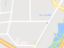
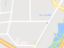

In [36]:
# dang, got blocked...

proxies = {
  'http': 'http://119.206.242.196'
}

# might have to reroute ip address
# maybe helpful? https://www.scrapehero.com/how-to-rotate-proxies-and-ip-addresses-using-python-3/

page = requests.get(URL, headers=headers, proxies=proxies)
soup = BeautifulSoup(page.content, 'html.parser')
soup

In [37]:
extract_images(URL)

['https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m3874086572xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m1065303919xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m1401207028xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m1982132875xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m1667225455xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m3496022374xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m3940178193xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m2250719783xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m310964043xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m3790738440xd-r3_w60_h60_q80.jpg',
 'https://ap.rdcpix.com/33cb3ce1fda944eb6660f3416960875cl-m544994688xd-